Loan Approval Project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("loan_approval_records.csv")






In [3]:
print(df.head())

   applicant_id gender married  dependents     education self_employed  \
0             1   Male      No           2  Not Graduate            No   
1             2   Male     Yes           2  Not Graduate            No   
2             3   Male      No           2      Graduate            No   
3             4   Male      No           0      Graduate            No   
4             5   Male     Yes           0      Graduate            No   

   applicant_income  coapplicant_income  loan_amount  loan_amount_term  \
0              6669                2155          376               300   
1              7053                3134           57               300   
2             13916                6984          237               120   
3              9341                 982          165               180   
4              7727                2368          400               360   

   credit_history property_area loan_status  
0               1         Urban    Approved  
1               0 

In [4]:

print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   applicant_id        3000 non-null   int64 
 1   gender              3000 non-null   object
 2   married             3000 non-null   object
 3   dependents          3000 non-null   int64 
 4   education           3000 non-null   object
 5   self_employed       3000 non-null   object
 6   applicant_income    3000 non-null   int64 
 7   coapplicant_income  3000 non-null   int64 
 8   loan_amount         3000 non-null   int64 
 9   loan_amount_term    3000 non-null   int64 
 10  credit_history      3000 non-null   int64 
 11  property_area       3000 non-null   object
 12  loan_status         3000 non-null   object
dtypes: int64(7), object(6)
memory usage: 304.8+ KB
None
applicant_id          0
gender                0
married               0
dependents            0
education           

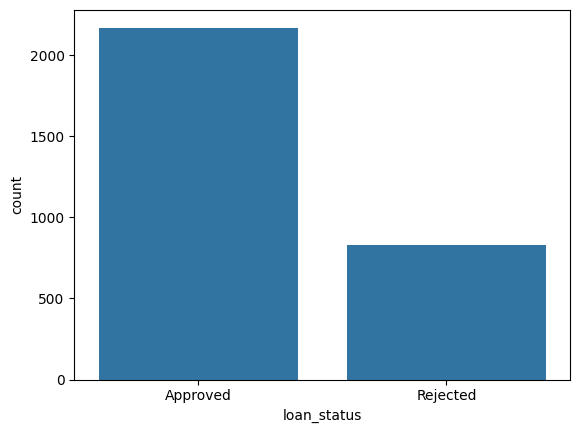

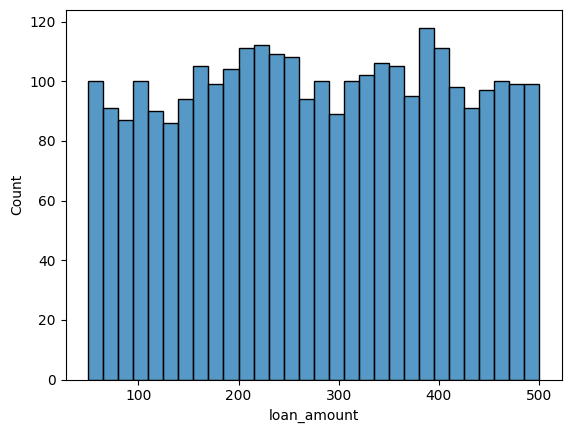

In [5]:
sns.countplot(x="loan_status", data=df)
plt.show()

sns.histplot(df["loan_amount"], bins=30)
plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder

# Fill missing values
df["loan_amount"].fillna(df["loan_amount"].median(), inplace=True)
df["credit_history"].fillna(df["credit_history"].mode()[0], inplace=True)
# Encode categorical columns
le = LabelEncoder()
for col in ["gender","married","education","self_employed","property_area","loan_status"]:
    df[col] = le.fit_transform(df[col])

print(df.head())


   applicant_id  gender  married  dependents  education  self_employed  \
0             1       1        0           2          1              0   
1             2       1        1           2          1              0   
2             3       1        0           2          0              0   
3             4       1        0           0          0              0   
4             5       1        1           0          0              0   

   applicant_income  coapplicant_income  loan_amount  loan_amount_term  \
0              6669                2155          376               300   
1              7053                3134           57               300   
2             13916                6984          237               120   
3              9341                 982          165               180   
4              7727                2368          400               360   

   credit_history  property_area  loan_status  
0               1              2            0  
1             

/tmp/ipython-input-2534541084.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["loan_amount"].fillna(df["loan_amount"].median(), inplace=True)
/tmp/ipython-input-2534541084.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.drop("loan_status", axis=1)
y = df["loan_status"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [8]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.73
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       423
           1       0.56      0.42      0.48       177

    accuracy                           0.73       600
   macro avg       0.67      0.64      0.65       600
weighted avg       0.71      0.73      0.72       600



In [9]:
sample = [[0, 10, 20, 30, 40, 50, 60, 70, 81, 90, 100, 101]]  # Example input
prediction = model.predict(sample)

if prediction[0] == 1:
    print("Loan Approved")
else:
    print("Loan Not Approved")


Loan Not Approved


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
